In [1]:
import pandas as pd 
import numpy as np
import os 
import sys 
target_job = '4076764'

In [2]:
# First 
names = {} # index to string of names
datasets = ['ionosphere', 'mammo_graphic', 'cleveland', 'wisconsin']
models = ['bag_model', 'nich_model']
for i,model in enumerate(models):
    for j, dataset in enumerate(datasets):
        names[(i * len(datasets)) + j + 1] = f'{model}{dataset}'
print(names.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8])


In [3]:
# First load data in 
data = {}
for fn in os.listdir(f'results_file/{target_job}/'):
    fn2 = os.listdir(f'results_file/{target_job}/{fn}/')[0] # currently these files only have one entry
    f = f'results_file/{target_job}/{fn}/{fn2}'
    data[int(fn)] = pd.read_csv(f, index_col=False)
print(f'Number of results files in job {target_job} = {len(data)}')

Number of results files in job 4076764 = 7


In [4]:
# Quick look at the data
data[1] # 1 -> num jobs

,member_generation,training,seed,time,full_acc,majority_acc,minority_acc,tn,fp,fn,tp
0,True,True,0,1.244495e+02,0.893878,0.993631,0.715909,63,25,1,156
1,True,False,0,1.244495e+02,0.811321,0.970588,0.526316,20,18,2,66
2,False,True,0,1.192093e-06,0.893878,0.993631,0.715909,63,25,1,156
3,False,False,0,1.192093e-06,0.811321,0.970588,0.526316,20,18,2,66
4,True,True,169,1.195984e+02,0.938776,0.993631,0.840909,74,14,1,156
...,...,...,...,...,...,...,...,...,...,...,...
115,False,False,4732,9.536743e-07,0.811321,1.000000,0.473684,18,20,0,68
116,True,True,4901,1.505057e+02,0.906122,0.968153,0.795455,70,18,5,152
117,True,False,4901,1.505057e+02,0.849057,0.970588,0.631579,24,14,2,66
118,False,True,4901,7.152557e-07,0.906122,0.968153,0.795455,70,18,5,152


In [5]:
# method to efficently grab correct subsections from 
def get_data(task_id, member_generation=False, training=False, numpy=False):
    x = data[task_id]
    x = x[x['member_generation'] == member_generation] 
    if numpy:
        x = x[x['training'] == training].to_numpy() # [final]
    else:
        x = x[x['training'] == training] # [final]
    return x

<AxesSubplot:xlabel='majority_acc', ylabel='minority_acc'>

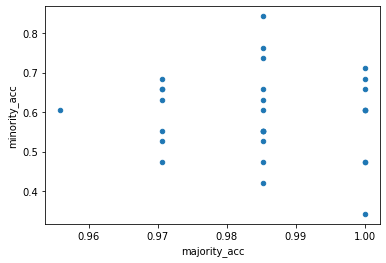

In [6]:
get_data(1).plot.scatter(x='majority_acc', y='minority_acc')

In [10]:
# Get the description for each. 
description = pd.DataFrame(data=[get_data(key)['full_acc'].describe() for key in data.keys()])
description = description.reset_index()
description = description.drop(columns='index')
name_dict = {}
i = 0
for model in models:
    for dataset in datasets:
        name_dict[i] = dataset+'_'+model
        i += 1
description.rename(index=name_dict, inplace=True)
description

,count,mean,std,min,25%,50%,75%,max
ionosphere_bag_model,30.0,0.744444,0.048826,0.644444,0.702778,0.750000,0.775000,0.866667
mammo_graphic_bag_model,30.0,0.752075,0.060869,0.514056,0.739960,0.763052,0.783133,0.823293
cleveland_bag_model,30.0,0.844969,0.038276,0.764151,0.820755,0.849057,0.865566,0.933962
wisconsin_bag_model,30.0,0.840650,0.082030,0.648780,0.812195,0.873171,0.896341,0.946341
ionosphere_nich_model,30.0,0.954146,0.015928,0.926829,0.941463,0.953659,0.965854,0.985366
mammo_graphic_nich_model,30.0,0.795556,0.040495,0.711111,0.769444,0.788889,0.822222,0.877778
cleveland_nich_model,30.0,0.789157,0.027819,0.751004,0.764056,0.783133,0.811245,0.851406
